In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import polyfit
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
sns.set_theme()

In [29]:
df= pd.read_csv("Electric_Production.csv",parse_dates=[0],index_col=[0])

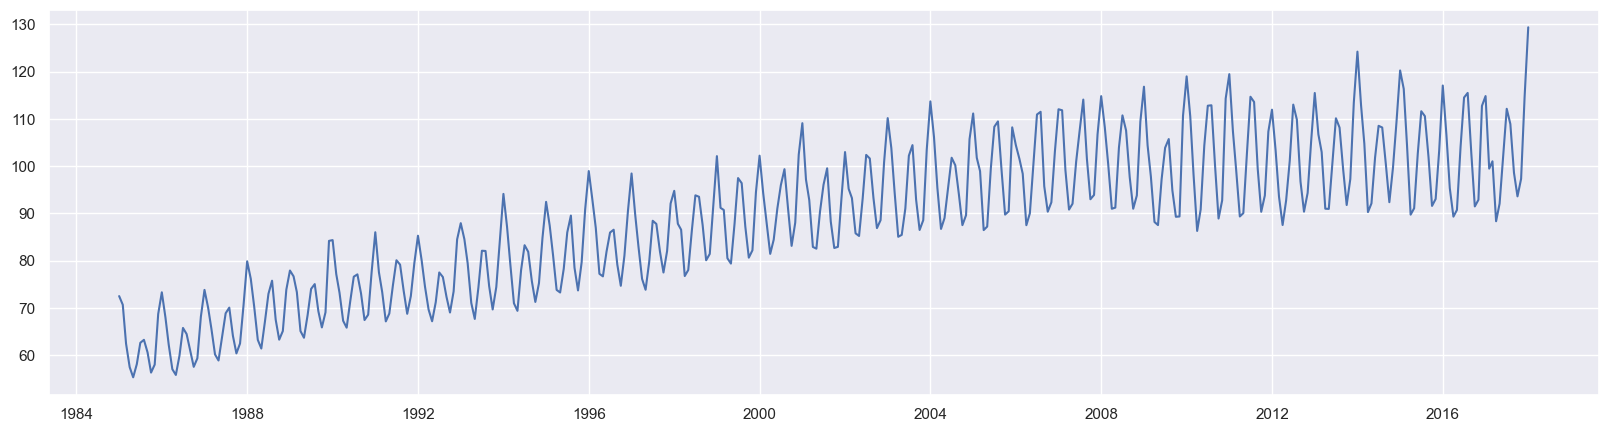

In [30]:
plt.figure(figsize=(20,5))
plt.plot(df)

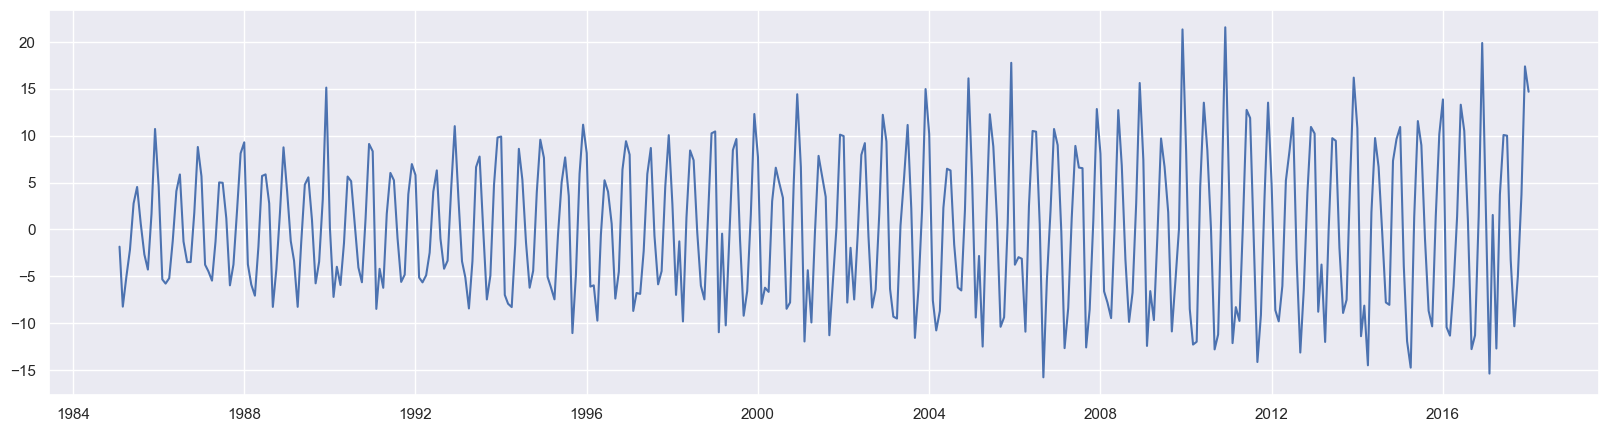

In [31]:
diff= df["IPG2211A2N"].diff(1)
plt.figure(figsize=(20,5))
plt.plot(diff)

In [32]:
x=[i%12 for i in range(len(diff))]
y=df.values
coeff= polyfit(x,y,deg=5)
coeff

array([[ 1.54035233e-02],
       [-3.78274970e-01],
       [ 3.00499285e+00],
       [-7.60484896e+00],
       [-2.47231973e+00],
       [ 1.02180680e+02]])

In [33]:
fitted=[]
for i in range(len(x)):
    value=coeff[-1]
    for j  in range(len(coeff-1)):
        value= value+ (x[i]**(5-j))*coeff[j]
    fitted.append(value)
fitted

[array([204.36136088]),
 array([196.92631359]),
 array([187.47778159]),
 array([182.73835157]),
 array([184.04885651]),
 array([189.21679854]),
 array([194.36477171]),
 array([195.77888477]),
 array([191.75718401]),
 array([184.45807599]),
 array([181.74875044]),
 array([199.05360295]),
 array([204.36136088]),
 array([196.92631359]),
 array([187.47778159]),
 array([182.73835157]),
 array([184.04885651]),
 array([189.21679854]),
 array([194.36477171]),
 array([195.77888477]),
 array([191.75718401]),
 array([184.45807599]),
 array([181.74875044]),
 array([199.05360295]),
 array([204.36136088]),
 array([196.92631359]),
 array([187.47778159]),
 array([182.73835157]),
 array([184.04885651]),
 array([189.21679854]),
 array([194.36477171]),
 array([195.77888477]),
 array([191.75718401]),
 array([184.45807599]),
 array([181.74875044]),
 array([199.05360295]),
 array([204.36136088]),
 array([196.92631359]),
 array([187.47778159]),
 array([182.73835157]),
 array([184.04885651]),
 array([189.2167

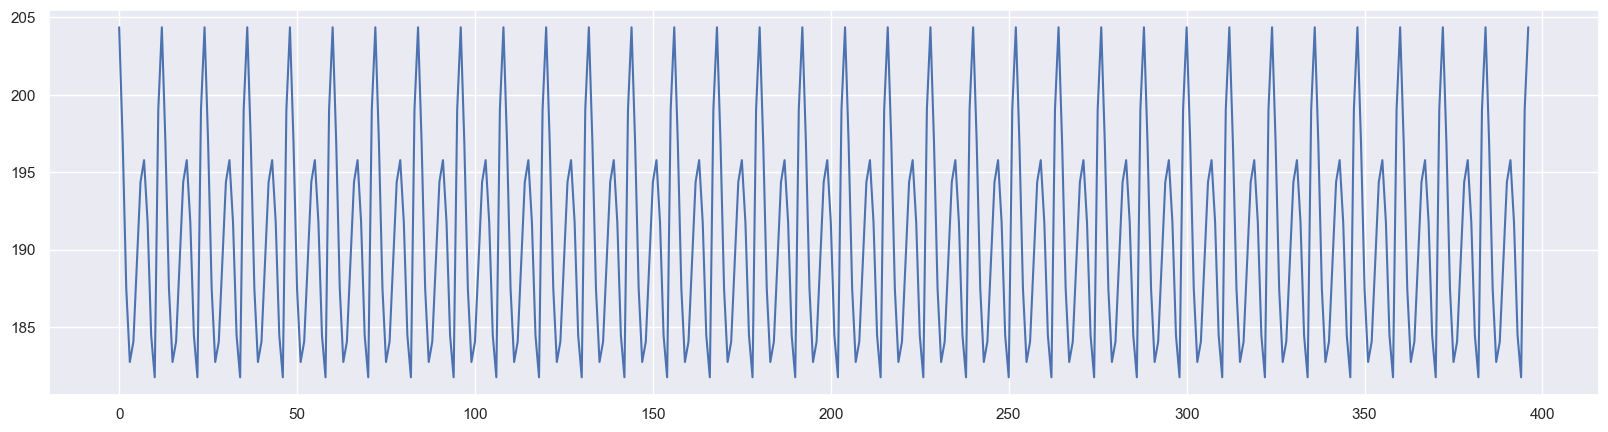

In [34]:
plt.figure(figsize=(20,5))
plt.plot(fitted)

In [35]:
adfuller(df["IPG2211A2N"])

(-2.256990350047244,
 0.18621469116586792,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

[]

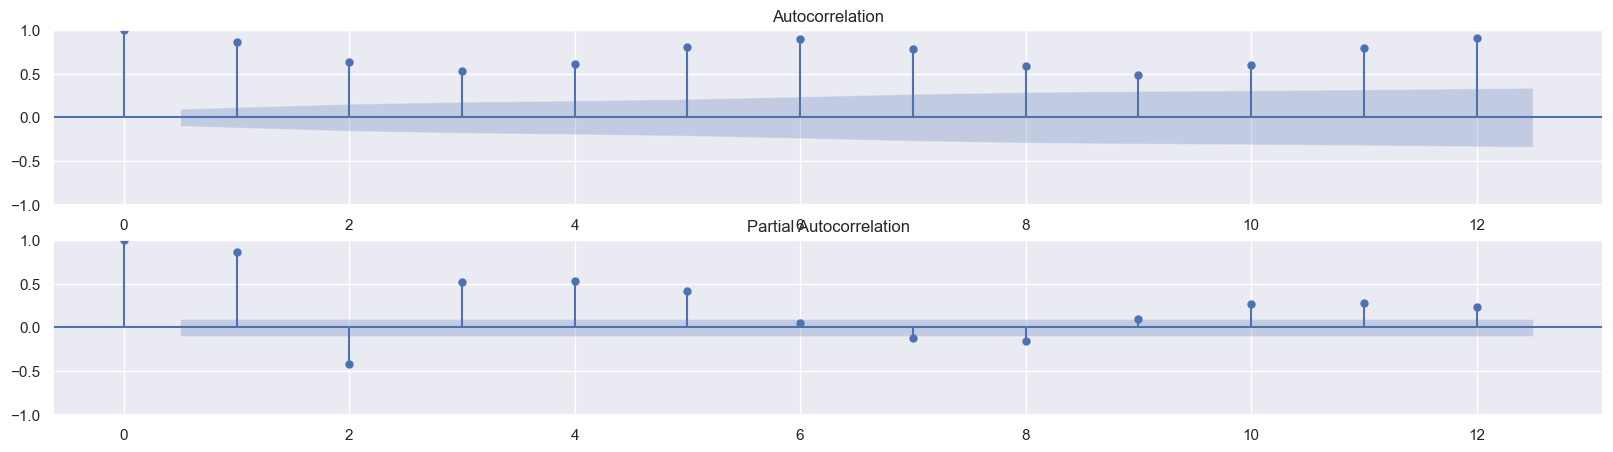

In [36]:
figure= plt.figure(figsize=(20,5))
ax1= figure.add_axes(211)
ax2= figure.add_axes(212)
plot_acf(df["IPG2211A2N"],lags=12,ax=ax1)
plot_pacf(df["IPG2211A2N"],lags=12,ax=ax2)
plt.plot()

In [38]:
model= ARIMA(df["IPG2211A2N"],order=(2,0,2))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
res= model.fit()
predictions = res.predict()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


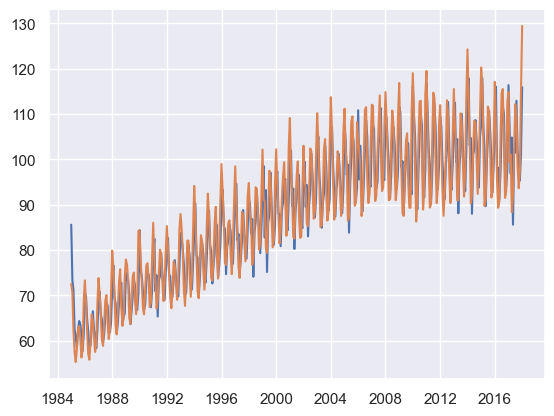

In [42]:
plt.plot(predictions)
plt.plot(df["IPG2211A2N"])

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1252.352
Date:                Thu, 04 Apr 2024   AIC                           2516.705
Time:                        11:38:52   BIC                           2540.608
Sample:                    01-01-1985   HQIC                          2526.174
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.5909     27.983      3.059      0.002      30.746     140.436
ar.L1          1.3496      0.073     18.539      0.000       1.207       1.492
ar.L2         -0.3501      0.073     -4.821      0.000      -0.492      -0.208
ma.L1         -0.2655      0.055     -4.854      0.000      -0.373      -0.158
ma.L2         -0.6462      0.049    -13.154      0.000      -0.742      -0.550
sigma2        31.8442      2.264     14.067      0.000      27.407      36.281
===================================================================================
Ljung-Box (L1) (Q):                   5.12   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.02   Prob(JB):                         0.75
Heteroskedasticity (H):               2.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model2= SARIMAX(df["IPG2211A2N"],order=(2,1,2),seasonal_order=(2,1,2,12))
res=model2.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30829D+00    |proj g|=  1.07501D-01

At iterate    5    f=  2.23043D+00    |proj g|=  3.50001D-02

At iterate   10    f=  2.21965D+00    |proj g|=  1.39414D-02

At iterate   15    f=  2.21189D+00    |proj g|=  2.17983D-02

At iterate   20    f=  2.21140D+00    |proj g|=  2.38427D-03

At iterate   25    f=  2.21068D+00    |proj g|=  1.44129D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     32      1     0     0   

In [47]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -877.639
Date:                            Thu, 04 Apr 2024   AIC                           1773.277
Time:                                    11:41:53   BIC                           1808.833
Sample:                                01-01-1985   HQIC                          1787.380
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0642      0.694      0.093      0.926      -1.296       1.424
ar.L2          0.1670      0.374      0.447      0.655      -0.565       0.899
ma.L1         -0.4886      0.685     -0.713      0.476      -1.832       0.855
ma.L2         -0.4344      0.657     -0.661      0.509      -1.722       0.853
ar.S.L12       0.4969      0.163      3.042      0.002       0.177       0.817
ar.S.L24      -0.3030      0.058     -5.241      0.000      -0.416      -0.190
ma.S.L12      -1.2334      0.162     -7.601      0.000      -1.552      -0.915
ma.S.L24       0.4788      0.130      3.684      0.000       0.224       0.734
sigma2         5.4387      0.318     17.108      0.000       4.816       6.062
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.66
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.83   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""